In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_coef(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b

In [3]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x,y, c='g')
    
    a,b = coef
    y_pred = a*x + b
    plt.plot(x, y_pred, c='r')
    plt.show()

In [6]:
np.random.seed(42)
N = 150
X = 6*np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*3

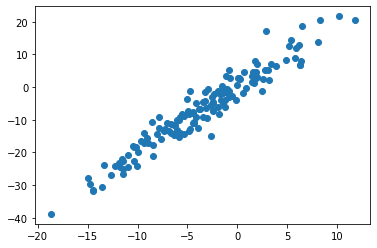

In [7]:
plt.scatter(X, y)

In [8]:
coef = estimate_coef(X, y)
coef

(1.9870820836236875, 0.168554548328828)

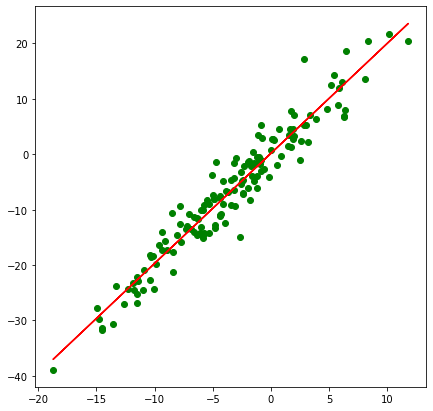

In [9]:
plot_lines(X, y, coef)

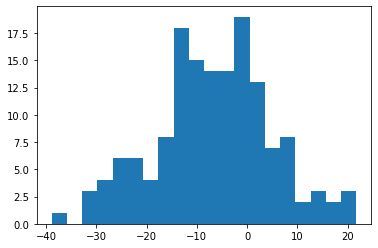

In [12]:
plt.hist(y, bins=20);

In [13]:
from scipy.stats import pearsonr

In [14]:
pearsonr(X, y)

(0.9647603482275336, 1.0391765316919123e-87)

### Użycie biblioteki scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
X.ndim

1

In [21]:
model = LinearRegression()
model.fit(X.reshape(-1,1) , y)

LinearRegression()

In [22]:
model.coef_ , model.intercept_

(array([1.98708208]), 0.16855454832882977)

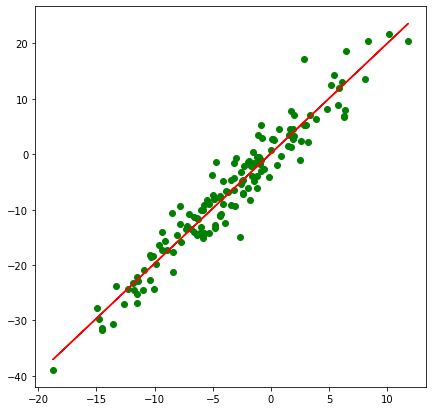

In [23]:
plot_lines(X,y, (model.coef_[0],model.intercept_ ) )

In [24]:
# importowanie metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
y_pred = model.predict(X.reshape(-1,1))

In [30]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(2.4011498652518806, 9.327145002043936)

In [31]:
r2_score(y, y_pred)

0.9307625295121121

 ### Efekt lejka

In [32]:
import pandas as pd

In [35]:
df = pd.read_csv(r"http://51.91.120.89/extras/advertising.csv", 
                 usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [38]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [39]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [40]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

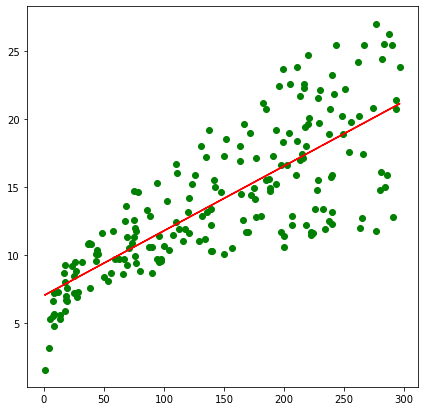

In [41]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [42]:
y_pred = model.predict(X)
r2_score(y, y_pred)

0.611875050850071

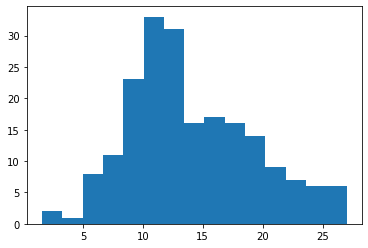

In [44]:
plt.hist(y, bins=15);

### Regresja wielomianowa

In [46]:
np.random.seed(0)

X = np.arange(-4, 4.2, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X) )

X = X.reshape(-1,1)

In [47]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

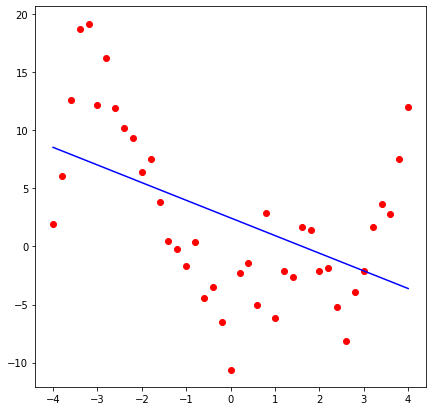

In [48]:
plt.figure(figsize=(7,7))
plt.scatter(X, y, c="r")
plt.plot(X, y_pred, c="b")

In [49]:
r2_score(y, y_pred)

0.2456973012029272

In [50]:
# przygotowanie danych X do regresji w stopniu >1
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pf = PolynomialFeatures(degree=3)
X_poly = pf.fit_transform(X)

In [53]:
X[0]

array([-4.])

In [54]:
X_poly[0]

array([  1.,  -4.,  16., -64.])

In [56]:
X.shape, X_poly.shape

((41, 1), (41, 4))

D=2, R2=0.5697544037009782
D=3, R2=0.6700030934995909
D=4, R2=0.7207373198555
D=5, R2=0.8821376701269634
D=6, R2=0.8821777742034193
D=7, R2=0.8831826910348755
D=8, R2=0.8958108344779775
D=9, R2=0.89624163997818
D=10, R2=0.9081113947867436


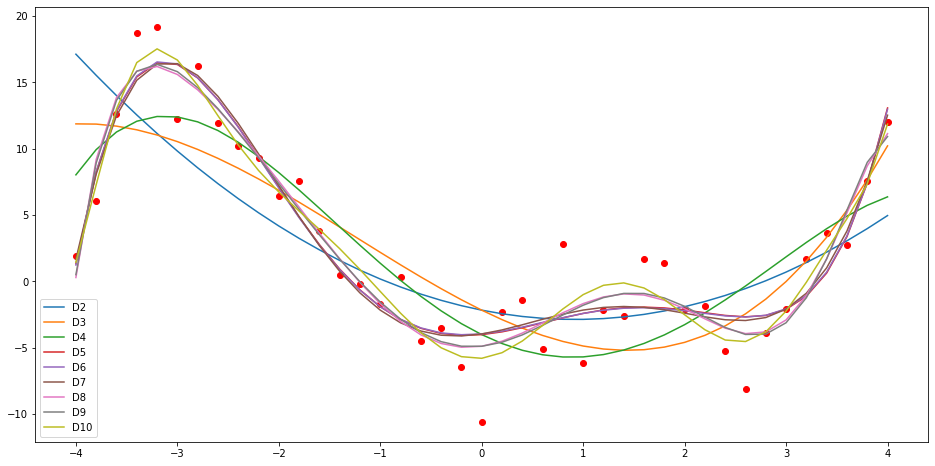

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, c="r")

for degree in range(2,11):
    pf = PolynomialFeatures(degree)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y, y_pred)}")

plt.legend()
plt.show()

### Regularyzacji regresji

In [61]:
# klasy do regularyzacji
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [62]:
np.random.seed(0)
X = np.unique( np.random.uniform(-3, 3, 100) )
y = 1/2*(X**2) + X + 2 + np.random.normal(0, 1, len(X) )

X = X.reshape(-1,1)

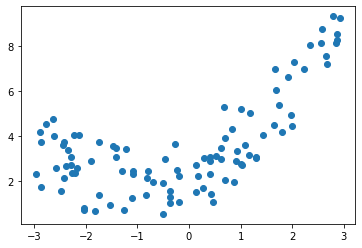

In [63]:
plt.scatter(X, y)

RW: R2=0.8398411453424146 
Lasso: R2=0.7560846372182832 
Ridge: R2=0.8375368368826693 
ElasticNet: R2=0.7609800429915305 


C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.8020675781386, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(
C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.31831426733647, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(


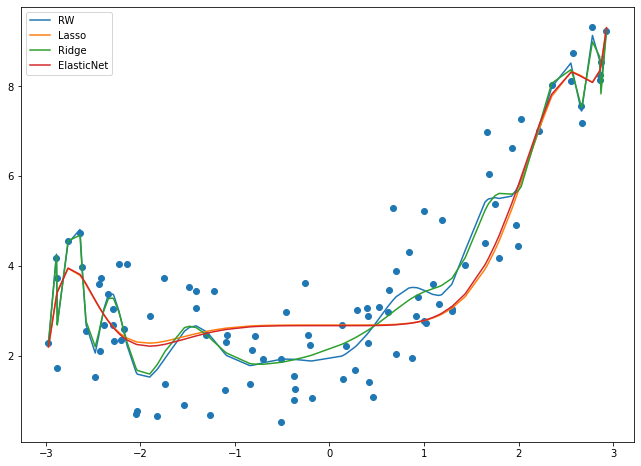

In [67]:
plt.figure(figsize=(11,8))
plt.scatter(X, y)

pf = PolynomialFeatures(degree=31)
X_poly = pf.fit_transform(X)

#RW
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="RW")
print(f"RW: R2={r2_score(y,y_pred)} ")

#Lasso
model = Lasso()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Lasso")
print(f"Lasso: R2={r2_score(y,y_pred)} ")

#Ridge
model = Ridge()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Ridge")
print(f"Ridge: R2={r2_score(y,y_pred)} ")

#ElasticNet
model = ElasticNet()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="ElasticNet")
print(f"ElasticNet: R2={r2_score(y,y_pred)} ")

plt.legend();

### Regresja wielozmienna

In [68]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [69]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [70]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [71]:
# konwersja z wart. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [72]:
df

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478392


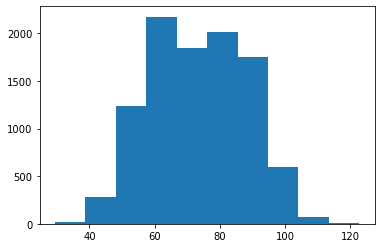

In [74]:
plt.hist(df.Weight);

In [75]:
import seaborn as sns

<AxesSubplot:xlabel='Weight', ylabel='Count'>

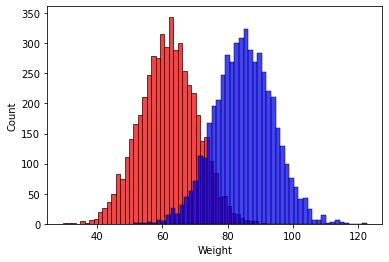

In [80]:
sns.histplot(df.query("Gender=='Female'").Weight, color="red")
sns.histplot(df.query("Gender=='Male'").Weight, color="blue")

In [83]:
df.Gender = df.Gender.map({
    "Male" : 0, "Female" : 1
})
df.sample(n=10, random_state=0)

,Gender,Height,Weight
9394,1,164.398647,62.766271
898,0,170.871313,85.165166
2398,0,189.283269,98.424178
5906,1,167.335236,59.891565
2343,0,164.709605,71.690199
8225,1,149.024221,44.780036
5506,1,164.597620,68.014522
6451,1,161.164020,60.688860
2670,0,174.046467,85.478788
3497,0,179.177192,95.544930


In [84]:
model = LinearRegression()
model.fit( df[["Gender","Height"]] , df.Weight )

LinearRegression()

In [85]:
model.coef_ , model.intercept_

(array([-8.80805024,  1.06960294]), -102.52081454490089)

In [86]:
pd.DataFrame(model.coef_, ["Gender","Height"] )

,0
Gender,-8.808050
Height,1.069603


In [90]:
model.predict([ [0, 192], [1,164], [0, 190] ])

array([102.84294991,  64.08601735, 100.70374403])

In [91]:
# formula do predykcji
height = 192
gender = 0

model.intercept_ + model.coef_[0]*gender + model.coef_[1]*height

102.84294990633599

### Predykcja cen mieszkań - W-wa/Mokotów

In [92]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [93]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


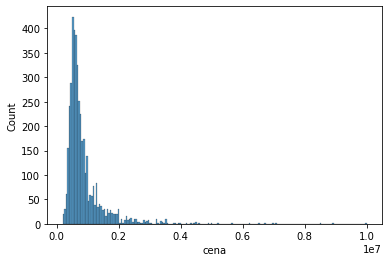

In [95]:
sns.histplot(df.cena);

In [96]:
df.corr()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
cena,1.000000,-0.188122,0.608984,-0.026369,0.854614,-0.001137
liczba_pieter,-0.188122,1.000000,-0.220447,0.497311,-0.232934,0.008719
liczba_pokoi,0.608984,-0.220447,1.000000,-0.053239,0.793551,-0.001417
pietro,-0.026369,0.497311,-0.053239,1.000000,-0.059320,0.019680
powierzchnia,0.854614,-0.232934,0.793551,-0.059320,1.000000,-0.003730
rok_budowy,-0.001137,0.008719,-0.001417,0.019680,-0.003730,1.000000


<AxesSubplot:>

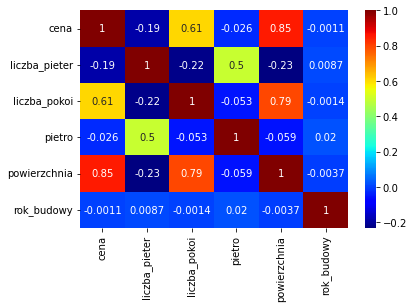

In [97]:
sns.heatmap( df.corr(), annot=True, cmap="jet" )

<AxesSubplot:>

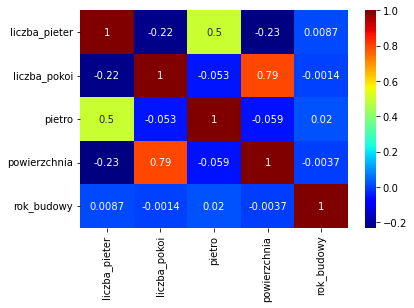

In [100]:
sns.heatmap( df.iloc[: , 2:].corr() , annot=True, cmap='jet')

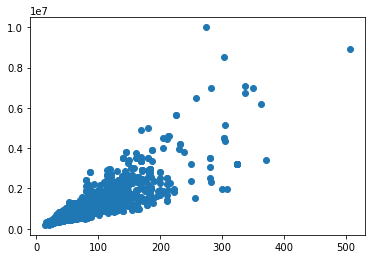

In [101]:
plt.scatter(df.powierzchnia, df.cena)

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


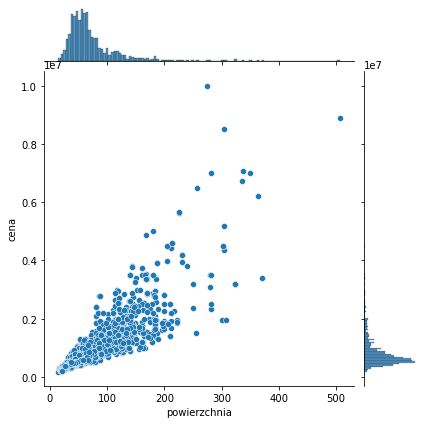

In [106]:
sns.jointplot(df.powierzchnia, df.cena )

In [102]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [107]:
min_ = df.describe().loc["min","cena"]
q3_ = df.describe().loc["75%","cena"]
min_ ,q3_

(187330.0, 939900.0)

In [108]:
df1 = df.query(f"cena>={min_} and cena<={q3_}")

<AxesSubplot:xlabel='cena', ylabel='Count'>

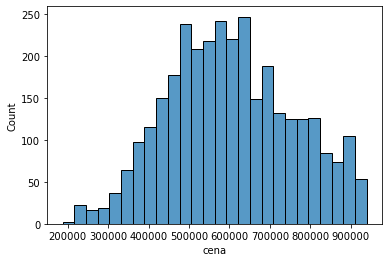

In [109]:
sns.histplot(df1.cena)

In [110]:
len(df), len(df1)

(4314, 3236)

In [112]:
X = df1.iloc[: , 2:]
y = df1.cena

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train.shape, X_test.shape

((2588, 5), (648, 5))

In [121]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6626635466445601
TEST: 0.6738871746608246


In [123]:
# estytmator na 4 cechach
X = df1[ ["liczba_pokoi","pietro","powierzchnia","rok_budowy"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6620663631999508
TEST: 0.6732281997211346


In [124]:
# estytmator na 3 cechach
X = df1[ ["pietro","powierzchnia","rok_budowy"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6565145657547679
TEST: 0.6662841546188927


In [125]:
# estytmator na 2 cechach
X = df1[ ["pietro","powierzchnia"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6565067556338289
TEST: 0.6663227282816685


In [126]:
# estytmator na 2 cechach
X = df1[ ["powierzchnia"] ]
y = df1.cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6564261873591819
TEST: 0.6657828244531119


### Analiza danych Boston House Pricing

In [147]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [128]:
ds = load_boston()

In [129]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [130]:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [132]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [133]:
X = df.iloc[: , :-1]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7508856358979672
TEST: 0.6687594935356306


In [140]:
best_cols = df.corr().iloc[-1].abs().sort_values(ascending=False)[1:11].index
best_cols

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN'],
      dtype='object')

In [141]:
X = df[ best_cols ]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.7057145874002422
TEST: 0.6437021254129367


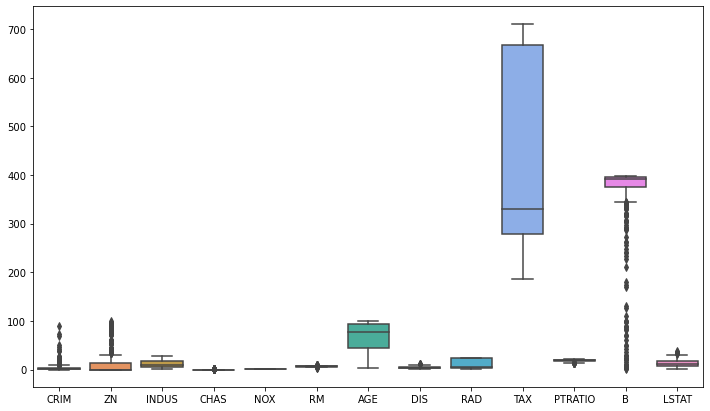

In [142]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df.iloc[:, :-1] );

TRAIN: 0.7508856358979673
TEST: 0.668759493535632


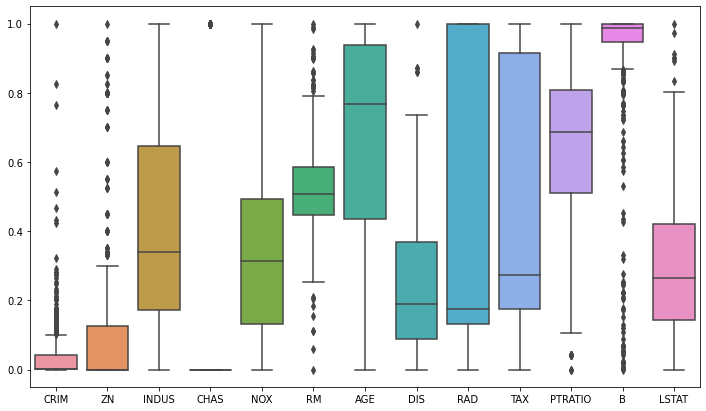

In [146]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

plt.figure(figsize=(12,7))
sns.boxplot(data=X);

TRAIN: 0.7508856358979673
TEST: 0.668759493535632


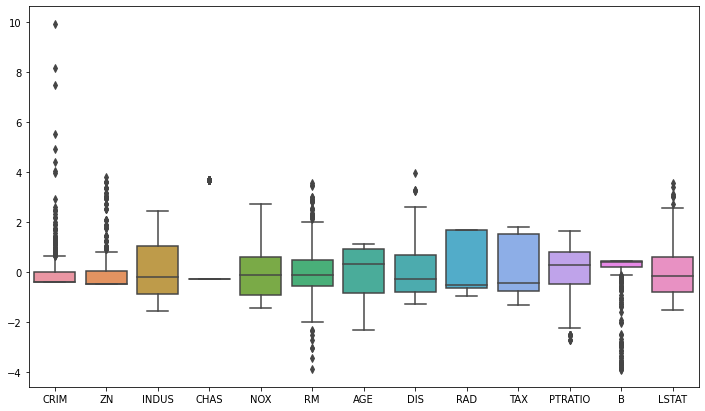

In [148]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

plt.figure(figsize=(12,7))
sns.boxplot(data=X);

TRAIN: 0.7508856358979673
TEST: 0.6687594935356327


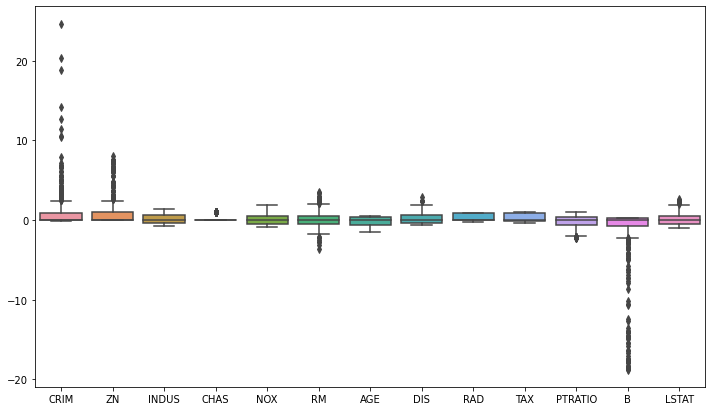

In [149]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

X = pd.DataFrame(x_scaled, columns=ds.feature_names)
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:",model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

plt.figure(figsize=(12,7))
sns.boxplot(data=X);